In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
%pwd
%cd ..

/Users/ENZO/KOOKIZ/GITHUB/translate-handsign


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
actions = ['아프다', '열', "기침", "콧물", "코막힘", "머리", "배", "설사", "변비", "구토"]
time_num, time_num1, time_num2 = '1744773358','1744773453', '1744773560'

for time_num in [time_num, time_num1, time_num2]:
    data = np.concatenate([
        np.load(f'dataset/seq_아프다_{time_num}.npy'),
        np.load(f'dataset/seq_열_{time_num}.npy'),
        np.load(f'dataset/seq_기침_{time_num}.npy'),
        np.load(f'dataset/seq_콧물_{time_num}.npy'),
        np.load(f'dataset/seq_코막힘_{time_num}.npy'),
        np.load(f'dataset/seq_머리_{time_num}.npy'),
        np.load(f'dataset/seq_배_{time_num}.npy'),
        np.load(f'dataset/seq_설사_{time_num}.npy'),
        np.load(f'dataset/seq_변비_{time_num}.npy'),
        np.load(f'dataset/seq_구토_{time_num}.npy')
    ], axis=0)

data.shape

(303, 10, 56)

In [4]:
print(np.load(f'dataset/seq_아프다_1744773358.npy').shape)
print(np.load(f'dataset/seq_열_1744773358.npy').shape)
print(np.load(f'dataset/seq_기침_1744773358.npy').shape)
print(np.load(f'dataset/seq_콧물_1744773358.npy').shape)
print(np.load(f'dataset/seq_코막힘_1744773358.npy').shape)
print(np.load(f'dataset/seq_머리_1744773358.npy').shape)
print(np.load(f'dataset/seq_배_1744773358.npy').shape)
print(np.load(f'dataset/seq_설사_1744773358.npy').shape)
print(np.load(f'dataset/seq_변비_1744773358.npy').shape)
print(np.load(f'dataset/seq_구토_1744773358.npy').shape)

(40, 10, 56)
(57, 10, 56)
(23, 10, 56)
(25, 10, 56)
(32, 10, 56)
(19, 10, 56)
(23, 10, 56)
(44, 10, 56)
(26, 10, 56)
(14, 10, 56)


In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(303, 10, 55)
(303,)


In [6]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7.

In [7]:
len(labels)

303

In [8]:
np.unique(labels)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [9]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(303, 10)

In [10]:
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [11]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2020)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(242, 10, 55) (242, 10)
(61, 10, 55) (61, 10)


In [12]:
x_train.shape[1:3]

(10, 55)

In [13]:
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [14]:
# custom f1 score
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(len(actions), activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',metric_F1score])
model.summary()

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        30,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,130 (129.41 KB)

 Trainable params: 33,130 (129.41 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_metric_F1score', min_delta = 0, patience = 20, mode = 'max')


history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/multi_hand_gesture_classifier.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_metric_F1score', factor=0.5, patience=50, verbose=1, mode='auto'),
        early_stopping
    ]
)

Epoch 1/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - acc: 0.0938 - loss: 46.0971 - metric_f1score: 0.0938
Epoch 1: val_acc improved from -inf to 0.08197, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.1451 - loss: 53.5500 - metric_f1score: 0.1414 - val_acc: 0.0820 - val_loss: 18.7773 - val_metric_f1score: nan - learning_rate: 0.0010
Epoch 2/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2188 - loss: 17.8263 - metric_f1score: 0.2034
Epoch 2: val_acc improved from 0.08197 to 0.16393, saving model to models/multi_hand_gesture_classifier.h5


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate.
  callback.on_epoch_end(epoch, logs)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate
  current = self.get_monitor_value(logs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.1465 - loss: 28.3010 - metric_f1score: 0.1390 - val_acc: 0.1639 - val_loss: 12.1446 - val_metric_f1score: 0.1343 - learning_rate: 0.0010
Epoch 3/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2500 - loss: 14.5319 - metric_f1score: 0.2667
Epoch 3: val_acc improved from 0.16393 to 0.36066, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2077 - loss: 21.0279 - metric_f1score: 0.2101 - val_acc: 0.3607 - val_loss: 9.2090 - val_metric_f1score: 0.3125 - learning_rate: 0.0010
Epoch 4/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.1562 - loss: 14.0974 - metric_f1score: 0.1053
Epoch 4: val_acc improved from 0.36066 to 0.45902, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2102 - loss: 16.5912 - metric_f1score: 0.1903 - val_acc: 0.4590 - val_loss: 7.6445 - val_metric_f1score: 0.4510 - learning_rate: 0.0010
Epoch 5/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2188 - loss: 8.0808 - metric_f1score: 0.2456
Epoch 5: val_acc improved from 0.45902 to 0.52459, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2646 - loss: 12.8171 - metric_f1score: 0.2644 - val_acc: 0.5246 - val_loss: 6.8591 - val_metric_f1score: 0.5313 - learning_rate: 0.0010
Epoch 6/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3125 - loss: 8.2016 - metric_f1score: 0.3448
Epoch 6: val_acc improved from 0.52459 to 0.54098, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3237 - loss: 13.0757 - metric_f1score: 0.3312 - val_acc: 0.5410 - val_loss: 6.1790 - val_metric_f1score: 0.5327 - learning_rate: 0.0010
Epoch 7/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2812 - loss: 17.2535 - metric_f1score: 0.2712
Epoch 7: val_acc improved from 0.54098 to 0.55738, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3006 - loss: 15.6854 - metric_f1score: 0.2960 - val_acc: 0.5574 - val_loss: 5.6127 - val_metric_f1score: 0.5820 - learning_rate: 0.0010
Epoch 8/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3125 - loss: 8.3306 - metric_f1score: 0.2593
Epoch 8: val_acc improved from 0.55738 to 0.62295, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3356 - loss: 11.6774 - metric_f1score: 0.3083 - val_acc: 0.6230 - val_loss: 5.1428 - val_metric_f1score: 0.6606 - learning_rate: 0.0010
Epoch 9/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2500 - loss: 10.1169 - metric_f1score: 0.2759
Epoch 9: val_acc improved from 0.62295 to 0.63934, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2896 - loss: 12.5452 - metric_f1score: 0.3030 - val_acc: 0.6393 - val_loss: 4.6407 - val_metric_f1score: 0.6544 - learning_rate: 0.0010
Epoch 10/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.1875 - loss: 8.0200 - metric_f1score: 0.1852
Epoch 10: val_acc improved from 0.63934 to 0.65574, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3503 - loss: 7.7192 - metric_f1score: 0.3511 - val_acc: 0.6557 - val_loss: 4.3685 - val_metric_f1score: 0.6976 - learning_rate: 0.0010
Epoch 11/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.3125 - loss: 4.9231 - metric_f1score: 0.3273
Epoch 11: val_acc improved from 0.65574 to 0.68852, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4456 - loss: 6.6503 - metric_f1score: 0.4636 - val_acc: 0.6885 - val_loss: 4.2833 - val_metric_f1score: 0.7139 - learning_rate: 0.0010
Epoch 12/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3750 - loss: 7.0012 - metric_f1score: 0.4138
Epoch 12: val_acc did not improve from 0.68852
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4079 - loss: 8.5272 - metric_f1score: 0.4096 - val_acc: 0.6721 - val_loss: 3.6097 - val_metric_f1score: 0.7203 - learning_rate: 0.0010
Epoch 13/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4062 - loss: 5.5779 - metric_f1score: 0.4643
Epoch 13: val_acc improved from 0.68852 to 0.75410, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.4501 - loss: 7.5740 - metric_f1score: 0.4650 - val_acc: 0.7541 - val_loss: 3.0744 - val_metric_f1score: 0.8027 - learning_rate: 0.0010
Epoch 14/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.4062 - loss: 5.2786 - metric_f1score: 0.3704
Epoch 14: val_acc did not improve from 0.75410
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.4560 - loss: 8.0025 - metric_f1score: 0.4653 - val_acc: 0.7377 - val_loss: 3.4038 - val_metric_f1score: 0.7749 - learning_rate: 0.0010
Epoch 15/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.5625 - loss: 4.8732 - metric_f1score: 0.5263
Epoch 15: val_acc did not improve from 0.75410
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.5249 - loss: 6.3809 - metric_f1score: 0.5222 - val_acc: 0.7541 - val_loss: 3.1511 - val_metric_f1score: 0.7997 - learning_rate: 0.0010
Epoch 16/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.4062 - loss: 4.0207 - metric_f1score: 0.3860
Epoch 16: val_acc did not improve from 0.7541

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6416 - loss: 3.6051 - metric_f1score: 0.6442 - val_acc: 0.7705 - val_loss: 2.5162 - val_metric_f1score: 0.7355 - learning_rate: 0.0010
Epoch 25/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.6562 - loss: 2.3158 - metric_f1score: 0.5818
Epoch 25: val_acc improved from 0.77049 to 0.78689, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6146 - loss: 3.3978 - metric_f1score: 0.5929 - val_acc: 0.7869 - val_loss: 2.3214 - val_metric_f1score: 0.7733 - learning_rate: 0.0010
Epoch 26/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.5312 - loss: 2.7070 - metric_f1score: 0.5000
Epoch 26: val_acc did not improve from 0.78689
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5778 - loss: 3.9466 - metric_f1score: 0.5605 - val_acc: 0.7869 - val_loss: 2.4280 - val_metric_f1score: 0.8009 - learning_rate: 0.0010
Epoch 27/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7188 - loss: 2.0740 - metric_f1score: 0.7119
Epoch 27: val_acc did not improve from 0.78689
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6656 - loss: 3.2831 - metric_f1score: 0.6655 - val_acc: 0.7869 - val_loss: 2.3302 - val_metric_f1score: 0.7995 - learning_rate: 0.0010
Epoch 28/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.6250 - loss: 2.9029 - metric_f1score: 0.5965
Epoch 28: val_acc did not improve from 0.78689
8

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6798 - loss: 3.3476 - metric_f1score: 0.6949 - val_acc: 0.8197 - val_loss: 2.3480 - val_metric_f1score: 0.8244 - learning_rate: 0.0010
Epoch 30/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.6875 - loss: 2.8434 - metric_f1score: 0.6780
Epoch 30: val_acc improved from 0.81967 to 0.83607, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.6886 - loss: 3.3299 - metric_f1score: 0.6894 - val_acc: 0.8361 - val_loss: 2.4567 - val_metric_f1score: 0.8332 - learning_rate: 0.0010
Epoch 31/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.5000 - loss: 2.9097 - metric_f1score: 0.5246
Epoch 31: val_acc improved from 0.83607 to 0.85246, saving model to models/multi_hand_gesture_classifier.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5533 - loss: 3.7259 - metric_f1score: 0.5734 - val_acc: 0.8525 - val_loss: 2.6158 - val_metric_f1score: 0.8468 - learning_rate: 0.0010
Epoch 32/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.6562 - loss: 3.0425 - metric_f1score: 0.6207
Epoch 32: val_acc did not improve from 0.85246
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6407 - loss: 4.1144 - metric_f1score: 0.6409 - val_acc: 0.8197 - val_loss: 2.3676 - val_metric_f1score: 0.8081 - learning_rate: 0.0010
Epoch 33/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.7500 - loss: 2.1744 - metric_f1score: 0.6780
Epoch 33: val_acc did not improve from 0.85246
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6798 - loss: 3.1830 - metric_f1score: 0.6667 - val_acc: 0.8525 - val_loss: 2.0251 - val_metric_f1score: 0.8504 - learning_rate: 0.0010
Epoch 34/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.6562 - loss: 2.3558 - metric_f1score: 0.6000
Epoch 34: val_acc did not improve from 0.85246
8

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6847 - loss: 2.9851 - metric_f1score: 0.6943 - val_acc: 0.8852 - val_loss: 1.5879 - val_metric_f1score: 0.8998 - learning_rate: 0.0010
Epoch 40/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.6562 - loss: 2.1143 - metric_f1score: 0.6441
Epoch 40: val_acc did not improve from 0.88525
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7207 - loss: 2.3003 - metric_f1score: 0.7134 - val_acc: 0.8525 - val_loss: 1.6669 - val_metric_f1score: 0.8672 - learning_rate: 0.0010
Epoch 41/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - acc: 0.5938 - loss: 2.8185 - metric_f1score: 0.5862
Epoch 41: val_acc did not improve from 0.88525
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6590 - loss: 3.0288 - metric_f1score: 0.6568 - val_acc: 0.8689 - val_loss: 1.6183 - val_metric_f1score: 0.8808 - learning_rate: 0.0010
Epoch 42/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7500 - loss: 2.2426 - metric_f1score: 0.7419
Epoch 42: val_acc improved from 0.88525 to 0.901

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.7235 - loss: 2.8955 - metric_f1score: 0.6997 - val_acc: 0.9016 - val_loss: 1.5174 - val_metric_f1score: 0.9174 - learning_rate: 0.0010
Epoch 43/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7812 - loss: 1.8245 - metric_f1score: 0.7586
Epoch 43: val_acc did not improve from 0.90164
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7131 - loss: 2.6858 - metric_f1score: 0.7235 - val_acc: 0.8852 - val_loss: 1.4598 - val_metric_f1score: 0.9078 - learning_rate: 0.0010
Epoch 44/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.6250 - loss: 2.1265 - metric_f1score: 0.7018
Epoch 44: val_acc did not improve from 0.90164
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7000 - loss: 2.5320 - metric_f1score: 0.7309 - val_acc: 0.8852 - val_loss: 1.4612 - val_metric_f1score: 0.9159 - learning_rate: 0.0010
Epoch 45/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.7188 - loss: 1.9919 - metric_f1score: 0.7119
Epoch 45: val_acc did not improve from 0.90164
8

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8419 - loss: 1.6651 - metric_f1score: 0.8503 - val_acc: 0.9180 - val_loss: 1.3151 - val_metric_f1score: 0.9152 - learning_rate: 0.0010
Epoch 55/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7500 - loss: 1.9264 - metric_f1score: 0.7541
Epoch 55: val_acc did not improve from 0.91803
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8196 - loss: 1.7115 - metric_f1score: 0.8224 - val_acc: 0.9016 - val_loss: 1.2750 - val_metric_f1score: 0.9152 - learning_rate: 0.0010
Epoch 56/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.8438 - loss: 1.2887 - metric_f1score: 0.8571
Epoch 56: val_acc did not improve from 0.91803
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8221 - loss: 1.6151 - metric_f1score: 0.8287 - val_acc: 0.9016 - val_loss: 1.2647 - val_metric_f1score: 0.9243 - learning_rate: 0.0010
Epoch 57/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8125 - loss: 1.5601 - metric_f1score: 0.8621
Epoch 57: val_acc did not improve from 0.91803
8

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.8136 - loss: 1.8752 - metric_f1score: 0.8233 - val_acc: 0.9344 - val_loss: 1.2354 - val_metric_f1score: 0.9245 - learning_rate: 0.0010
Epoch 59/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8438 - loss: 1.5067 - metric_f1score: 0.8276
Epoch 59: val_acc did not improve from 0.93443
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8498 - loss: 1.6180 - metric_f1score: 0.8533 - val_acc: 0.9180 - val_loss: 1.2204 - val_metric_f1score: 0.9171 - learning_rate: 0.0010
Epoch 60/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8750 - loss: 1.4768 - metric_f1score: 0.8525
Epoch 60: val_acc did not improve from 0.93443
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8231 - loss: 1.7258 - metric_f1score: 0.8269 - val_acc: 0.9016 - val_loss: 1.1948 - val_metric_f1score: 0.9412 - learning_rate: 0.0010
Epoch 61/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7500 - loss: 1.4041 - metric_f1score: 0.8070
Epoch 61: val_acc did not improve from 0.93443


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.8400 - loss: 1.4617 - metric_f1score: 0.8650 - val_acc: 0.9508 - val_loss: 1.1801 - val_metric_f1score: 0.9499 - learning_rate: 0.0010
Epoch 64/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.8750 - loss: 1.4515 - metric_f1score: 0.8889
Epoch 64: val_acc did not improve from 0.95082
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8437 - loss: 1.5995 - metric_f1score: 0.8570 - val_acc: 0.9508 - val_loss: 1.1756 - val_metric_f1score: 0.9499 - learning_rate: 0.0010
Epoch 65/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9062 - loss: 1.4192 - metric_f1score: 0.8889
Epoch 65: val_acc did not improve from 0.95082
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9074 - loss: 1.5378 - metric_f1score: 0.9044 - val_acc: 0.9344 - val_loss: 1.2053 - val_metric_f1score: 0.9583 - learning_rate: 0.0010
Epoch 66/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9375 - loss: 1.2799 - metric_f1score: 0.9180
Epoch 66: val_acc did not improve from 0.95082
8

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.8623 - loss: 1.3572 - metric_f1score: 0.8836 - val_acc: 0.9672 - val_loss: 1.0211 - val_metric_f1score: 0.9674 - learning_rate: 0.0010
Epoch 91/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - acc: 0.9375 - loss: 1.0565 - metric_f1score: 0.9677
Epoch 91: val_acc did not improve from 0.96721
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9012 - loss: 1.2448 - metric_f1score: 0.9179 - val_acc: 0.9672 - val_loss: 1.0219 - val_metric_f1score: 0.9600 - learning_rate: 0.0010
Epoch 92/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9688 - loss: 1.2144 - metric_f1score: 0.9180
Epoch 92: val_acc did not improve from 0.96721
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9193 - loss: 1.3095 - metric_f1score: 0.9126 - val_acc: 0.9672 - val_loss: 1.0204 - val_metric_f1score: 0.9600 - learning_rate: 0.0010
Epoch 93/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8438 - loss: 1.2162 - metric_f1score: 0.8852
Epoch 93: val_acc did not improve from 0.96721


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9343 - loss: 1.0953 - metric_f1score: 0.9357 - val_acc: 0.9836 - val_loss: 0.9306 - val_metric_f1score: 0.9844 - learning_rate: 0.0010
Epoch 107/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 1.0000 - loss: 0.9782 - metric_f1score: 0.9841
Epoch 107: val_acc did not improve from 0.98361
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9355 - loss: 1.2307 - metric_f1score: 0.9322 - val_acc: 0.9672 - val_loss: 0.9478 - val_metric_f1score: 0.9762 - learning_rate: 0.0010
Epoch 108/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8438 - loss: 1.2569 - metric_f1score: 0.8254
Epoch 108: val_acc did not improve from 0.98361
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9038 - loss: 1.1984 - metric_f1score: 0.9032 - val_acc: 0.9672 - val_loss: 0.9678 - val_metric_f1score: 0.9762 - learning_rate: 0.0010
Epoch 109/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8750 - loss: 1.0764 - metric_f1score: 0.9000
Epoch 109: val_acc did not improve from 0.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9566 - loss: 0.8827 - metric_f1score: 0.9590 - val_acc: 1.0000 - val_loss: 0.7870 - val_metric_f1score: 1.0000 - learning_rate: 0.0010
Epoch 151/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9688 - loss: 0.8272 - metric_f1score: 0.9688
Epoch 151: val_acc did not improve from 1.00000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9605 - loss: 0.8715 - metric_f1score: 0.9603 - val_acc: 1.0000 - val_loss: 0.7834 - val_metric_f1score: 1.0000 - learning_rate: 0.0010
Epoch 152/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9688 - loss: 0.8380 - metric_f1score: 0.9677
Epoch 152: val_acc did not improve from 1.00000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9380 - loss: 0.9309 - metric_f1score: 0.9383 - val_acc: 0.9836 - val_loss: 0.7834 - val_metric_f1score: 0.9921 - learning_rate: 0.0010
Epoch 153/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 1.0000 - loss: 0.7740 - metric_f1score: 1.0000
Epoch 153: val_acc did not improve from 1.0

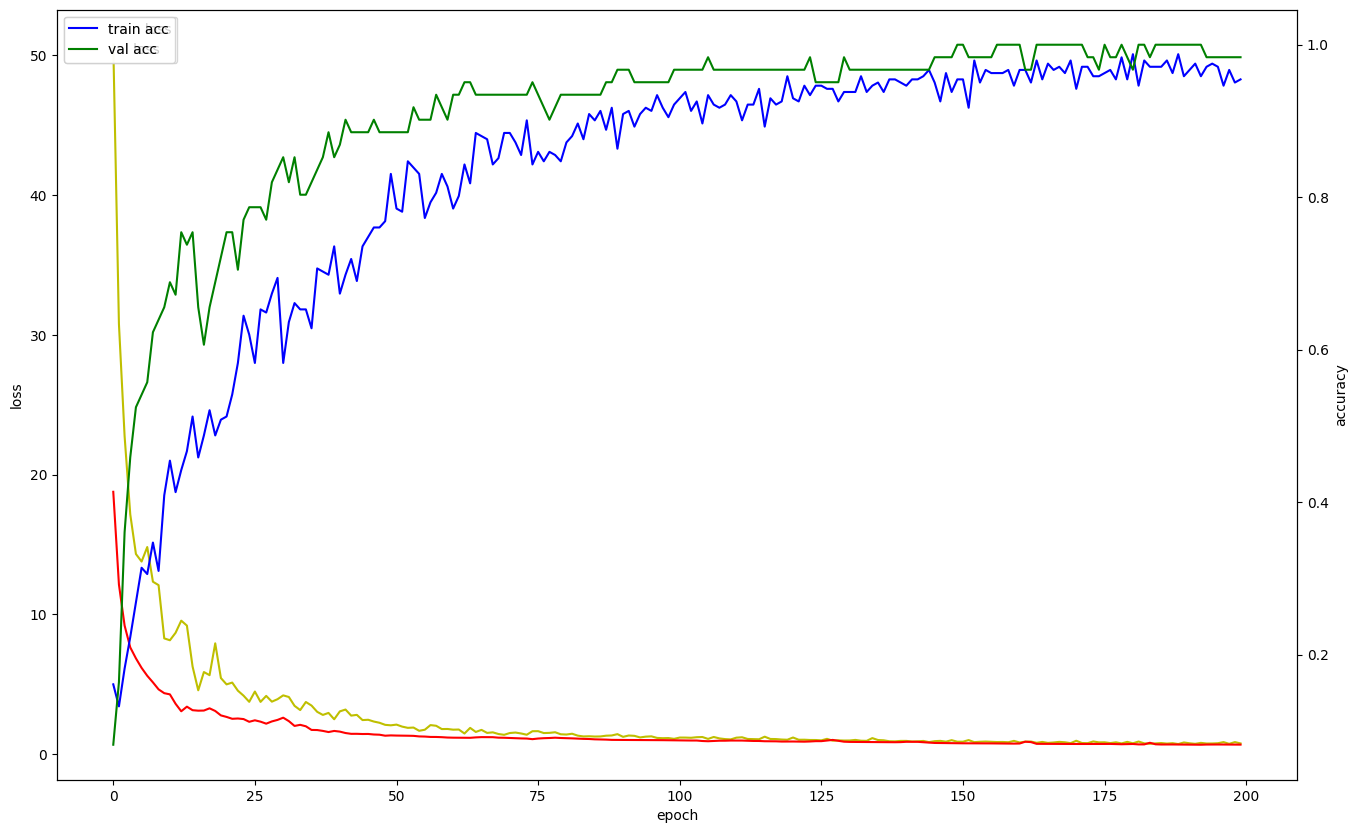

In [17]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

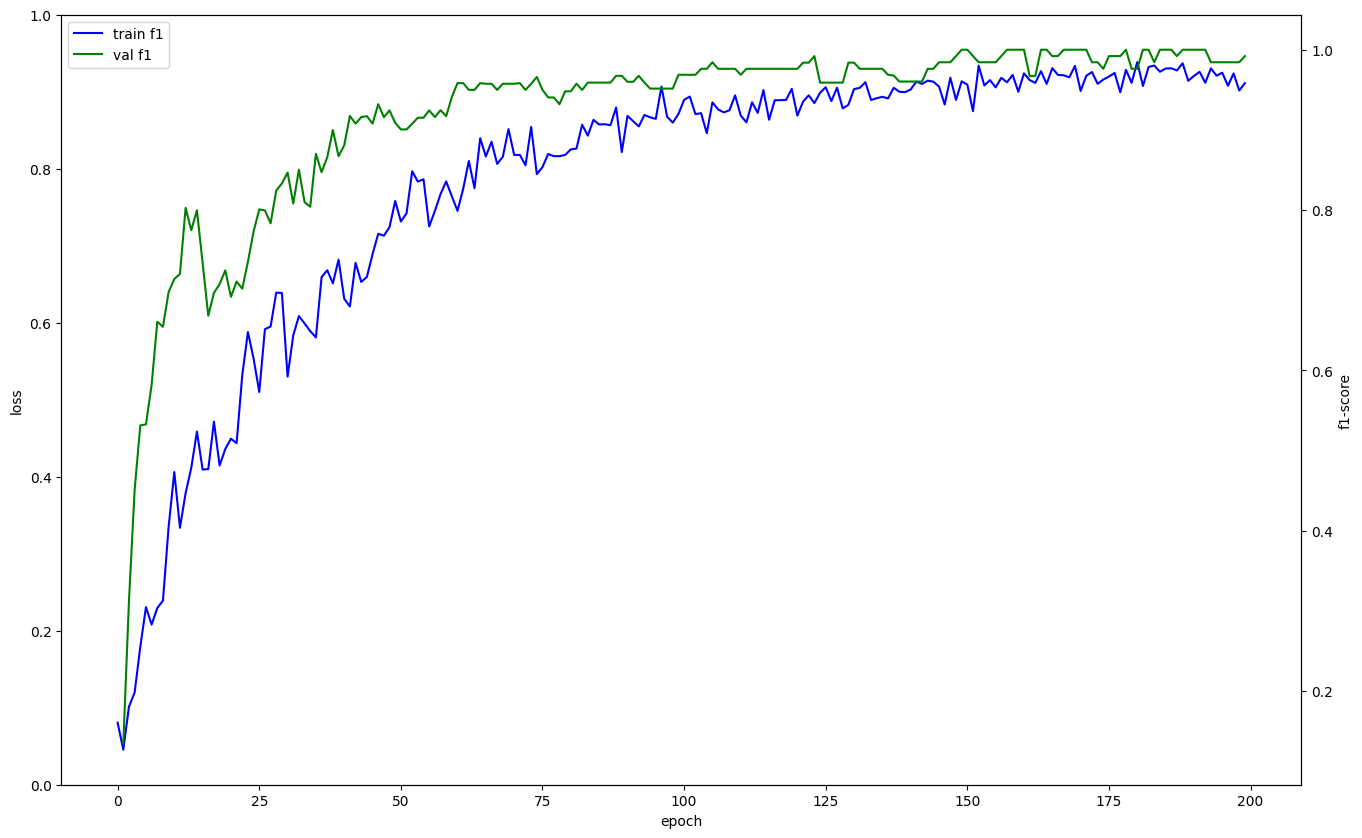

In [19]:
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['metric_f1score'], 'b', label='train f1')
acc_ax.plot(history.history['val_metric_f1score'], 'g', label='val f1')
acc_ax.set_ylabel('f1-score')
acc_ax.legend(loc='upper left')

plt.show()

In [20]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5', custom_objects = {'metric_F1score':metric_F1score})

y_pred = model.predict(x_val)
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[[51,  0],
        [ 0, 10]],

       [[48,  0],
        [ 0, 13]],

       [[57,  0],
        [ 0,  4]],

       [[58,  0],
        [ 0,  3]],

       [[56,  0],
        [ 0,  5]],

       [[57,  0],
        [ 0,  4]],

       [[56,  0],
        [ 0,  5]],

       [[53,  0],
        [ 0,  8]],

       [[57,  0],
        [ 0,  4]],

       [[56,  0],
        [ 0,  5]]])

In [21]:
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[51,  0],
        [ 0, 10]],

       [[48,  0],
        [ 0, 13]],

       [[57,  0],
        [ 0,  4]],

       [[58,  0],
        [ 0,  3]],

       [[56,  0],
        [ 0,  5]],

       [[57,  0],
        [ 0,  4]],

       [[56,  0],
        [ 0,  5]],

       [[53,  0],
        [ 0,  8]],

       [[57,  0],
        [ 0,  4]],

       [[56,  0],
        [ 0,  5]]])

In [22]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[[51,  0],
        [ 0, 10]],

       [[48,  0],
        [ 0, 13]],

       [[57,  0],
        [ 0,  4]],

       [[58,  0],
        [ 0,  3]],

       [[56,  0],
        [ 0,  5]],

       [[57,  0],
        [ 0,  4]],

       [[56,  0],
        [ 0,  5]],

       [[53,  0],
        [ 0,  8]],

       [[57,  0],
        [ 0,  4]],

       [[56,  0],
        [ 0,  5]]])

In [23]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 1. TF Lite 기본 연산 + Select TF ops 사용
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

# 2. TensorList lowering 비활성화
converter._experimental_lower_tensor_list_ops = False

# 변환 실행
tflite_model = converter.convert()

# 모델 저장
with open('models/multi_hand_gesture_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmp4u1wgp01/assets


INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmp4u1wgp01/assets


Saved artifact at '/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmp4u1wgp01'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 55), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  12922687504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12922695248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12922699120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12922729776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12922727312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12922742288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12922739296: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1744774186.577402 7739950 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744774186.577441 7739950 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-16 12:29:46.577745: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmp4u1wgp01
2025-04-16 12:29:46.578406: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-16 12:29:46.578414: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmp4u1wgp01
I0000 00:00:1744774186.583388 7739950 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-16 12:29:46.584096: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-16 12:29:46.610382: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder